In [2]:
import pandas as pd
import os
import sys
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import glob
import seaborn as sns

# modify pandas variabls to only show 10 rows.
pd.set_option("display.max_rows", 10)

outdir='/mnt/scgc/simon/microg2p/bioinformatics_course/Analyses/GTDB/'
os.chdir(outdir)

# First step load the data into dataframes and examine it. 
combine the data into a single dataframe for easier manipulation of archaeal and bacterial SAGs

In [3]:

GTDB_df=pd.read_csv('AG-910_gtdb_1.5_classify_wf_out2/gtdbtk.bac120.summary.tsv', sep='\t')


GTDB_df['SAG']=GTDB_df['user_genome'].str[:10]

GTDB_df


,user_genome,classification,fastani_reference,fastani_reference_radius,fastani_taxonomy,fastani_ani,fastani_af,closest_placement_reference,closest_placement_radius,closest_placement_taxonomy,...,closest_placement_af,pplacer_taxonomy,classification_method,note,"other_related_references(genome_id,species_name,radius,ANI,AF)",msa_percent,translation_table,red_value,warnings,SAG
0,AG-910-A02_contigs,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,GCA_003280455.1,95.0,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,95.95,0.80,GCA_003280455.1,95.0,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,...,0.80,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,taxonomic classification defined by topology a...,topological placement and ANI have congruent s...,"GCA_902563885.1, s__TMED112 sp902563885, 95.0,...",52.63,11,NaN,NaN,AG-910-A02
1,AG-910-A04_contigs,d__Bacteria;p__Actinobacteriota;c__Acidimicrob...,GCA_902615855.1,95.0,d__Bacteria;p__Actinobacteriota;c__Acidimicrob...,99.96,0.94,GCA_902615855.1,95.0,d__Bacteria;p__Actinobacteriota;c__Acidimicrob...,...,0.94,d__Bacteria;p__Actinobacteriota;c__Acidimicrob...,taxonomic classification defined by topology a...,topological placement and ANI have congruent s...,"GCA_003213625.1, s__Actinomarina sp003213625, ...",31.09,11,NaN,NaN,AG-910-A04
2,AG-910-A06_contigs,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,GCA_902567045.1,95.0,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,97.82,0.84,GCA_902567045.1,95.0,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,...,0.84,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,taxonomic classification defined by topology a...,topological placement and ANI have congruent s...,"GCA_902596915.1, s__Pelagibacter sp902596915, ...",70.76,11,NaN,NaN,AG-910-A06
3,AG-910-A10_contigs,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,GCA_902518715.1,95.0,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,96.38,0.80,GCA_902518715.1,95.0,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,...,0.80,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,taxonomic classification defined by topology a...,topological placement and ANI have congruent s...,"GCA_902541365.1, s__CACNXK01 sp902541365, 95.0...",68.37,11,NaN,NaN,AG-910-A10
4,AG-910-A13_contigs,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,GCA_002702235.1,95.0,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,98.62,0.92,GCA_002702235.1,95.0,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,...,0.92,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,taxonomic classification defined by topology a...,topological placement and ANI have congruent s...,NaN,43.52,11,NaN,NaN,AG-910-A13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,AG-910-P07_contigs,d__Bacteria;p__Cyanobacteria;c__Cyanobacteriia...,GCA_902520485.1,95.0,d__Bacteria;p__Cyanobacteria;c__Cyanobacteriia...,98.70,0.77,GCA_902520485.1,95.0,d__Bacteria;p__Cyanobacteria;c__Cyanobacteriia...,...,0.77,d__Bacteria;p__Cyanobacteria;c__Cyanobacteriia...,taxonomic classification defined by topology a...,topological placement and ANI have congruent s...,"GCA_000634415.1, s__Prochlorococcus_A sp000634...",48.42,11,NaN,NaN,AG-910-P07
166,AG-910-P08_contigs,d__Bacteria;p__Actinobacteriota;c__Acidimicrob...,GCA_003213165.1,95.0,d__Bacteria;p__Actinobacteriota;c__Acidimicrob...,98.73,0.78,GCA_003213165.1,95.0,d__Bacteria;p__Actinobacteriota;c__Acidimicrob...,...,0.78,d__Bacteria;p__Actinobacteriota;c__Acidimicrob...,taxonomic classification defined by topology a...,topological placement and ANI have congruent s...,"GCA_003281085.1, s__Actinomarina sp003281085, ...",37.50,11,NaN,NaN,AG-910-P08
167,AG-910-P13_contigs,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,taxonomic classification defined by topology a...,NaN,"GCA_902524215.1, s__TMED54 sp902524215, 95.0, ...",49.89,11,0.982298,Genome not assigned to closest species as it f...,

Note this plate only contained bacteria. If there are Archaea in the sample GTDB will produce a seperate file for genomes that are classified as Archaeal. 

# Challenge 1: How would you go about combining the tables for bacteria and archaea

### Extract just the data that we are interested in

In [4]:
# define the columns that we are interested in
cols=['SAG', 'classification', 'classification_method', 'warnings']

# create a new dataframe with just the columns from GTDB of interest
class_df=GTDB_df[cols].copy()

# split the classification into tax level columns and rename
class_df[['domain', 'phyla', 'class', 'order', 'family', 'genus', 'species']]=class_df.classification.str.split(';', expand=True)
class_df=class_df.rename(columns = {'classification':'GTDBtk_classification'})

# add a count column
class_df['cells']=1

#reset the index and save just the calssifications
class_df.reset_index(inplace=True)
class_df.drop(columns='index', inplace=True)
class_df.to_csv(outdir+'AG-910_GTDB_classifications.csv')

#show the dataframe
class_df




,SAG,GTDBtk_classification,classification_method,warnings,domain,phyla,class,order,family,genus,species,cells
0,AG-910-A02,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,taxonomic classification defined by topology a...,NaN,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__SAR86,f__TMED112,g__TMED112,s__TMED112 sp003280455,1
1,AG-910-A04,d__Bacteria;p__Actinobacteriota;c__Acidimicrob...,taxonomic classification defined by topology a...,NaN,d__Bacteria,p__Actinobacteriota,c__Acidimicrobiia,o__Actinomarinales,f__Actinomarinaceae,g__Actinomarina,s__Actinomarina sp902615855,1
2,AG-910-A06,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,taxonomic classification defined by topology a...,NaN,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Pelagibacterales,f__Pelagibacteraceae,g__Pelagibacter,s__Pelagibacter sp902567045,1
3,AG-910-A10,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,taxonomic classification defined by topology a...,NaN,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__SAR86,f__D2472,g__CACNXK01,s__CACNXK01 sp902518715,1
4,AG-910-A13,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,taxonomic classification defined by topology a...,NaN,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__GCA-002705445,f__GCA-002705445,g__GCA-2702235,s__GCA-2702235 sp002702235,1
...,...,...,...,...,...,...,...,...,...,...,...,...
165,AG-910-P07,d__Bacteria;p__Cyanobacteria;c__Cyanobacteriia...,taxonomic classification defined by topology a...,NaN,d__Bacteria,p__Cyanobacteria,c__Cyanobacteriia,o__PCC-6307,f__Cyanobiaceae,g__Prochlorococcus_A,s__Prochlorococcus_A sp902520485,1
166,AG-910-P08,d__Bacteria;p__Actinobacteriota;c__Acidimicrob...,taxonomic classification defined by topology a...,NaN,d__Bacteria,p__Actinobacteriota,c__Acidimicrobiia,o__Actinomarinales,f__Actinomarinaceae,g__Actinomarina,s__Actinomarina sp003213165,1
167,AG-910-P13,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,taxonomic classification defined by topology a...,Genome not assigned to closest species as it f...,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Puniceispirillales,f__AAA536-G10,g__TMED54,s__,1
168,AG-910-P17,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,taxonomic classification defined by topology a...,NaN,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Pelagibacterales,f__Pelagibacteraceae,g__Pelagibacter,s__Pelagibacter sp902594705,1


### Now lets load the SAG metadata and combine it with the GTDB results for further examination

In [5]:
# load the SAG metadata
SAG_data=pd.read_csv('/mnt/scgc/simon/microg2p/bioinformatics_course/data/sag_deliverables/AG-910_gorg-tropics_CelltableS2.csv', 
                     index_col=0)

#merge the SAG metadata with the GTDB data 
master_df=SAG_data.merge(class_df, on='SAG', how='outer')
master_df

,SAG,Sample,Sample feature,FACS mode,Estimated cell diameter (μm),WGA-X Cp (h),Raw read count,Assembly size (Mbp),Final contigs count,Max contig length,...,classification_method,warnings,domain,phyla,class,order,family,genus,species,cells
0,AG-910-A01,SWC-09,BATS Mixed Layer ~20% narB,Syto9-Prok,0.18,3.239536,61589,72175,14,20059,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AG-910-A02,SWC-09,BATS Mixed Layer ~20% narB,Syto9-Prok,0.24,1.769893,2596242,502406,26,120161,...,taxonomic classification defined by topology a...,NaN,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__SAR86,f__TMED112,g__TMED112,s__TMED112 sp003280455,1.0
2,AG-910-A03,SWC-09,BATS Mixed Layer ~20% narB,Syto9-Prok,0.29,2.200094,2514079,240410,32,24968,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AG-910-A04,SWC-09,BATS Mixed Layer ~20% narB,Syto9-Prok,0.23,1.959266,2648866,473338,24,111384,...,taxonomic classification defined by topology a...,NaN,d__Bacteria,p__Actinobacteriota,c__Acidimicrobiia,o__Actinomarinales,f__Actinomarinaceae,g__Actinomarina,s__Actinomarina sp902615855,1.0
4,AG-910-A06,SWC-09,BATS Mixed Layer ~20% narB,Syto9-Prok,0.28,1.980436,2652499,1010309,40,179684,...,taxonomic classification defined by topology a...,NaN,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Pelagibacterales,f__Pelagibacteraceae,g__Pelagibacter,s__Pelagibacter sp902567045,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,AG-910-P08,SWC-09,BATS Mixed Layer ~20% narB,Syto9-Prok,0.18,2.538867,3001784,591018,25,81973,...,taxonomic classification defined by topology a...,NaN,d__Bacteria,p__Actinobacteriota,c__Acidimicrobiia,o__Actinomarinales,f__Actinomarinaceae,g__Actinomarina,s__Actinomarina sp003213165,1.0
222,AG-910-P13,SWC-09,BATS Mixed Layer ~20% narB,Syto9-Prok,0.29,2.418582,3502173,939837,70,99836,...,taxonomic classification defined by topology a...,Genome not assigned to closest species as it f...,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Puniceispirillales,f__AAA536-G10,g__TMED54,s__,1.0
223,AG-910-P17,SWC-09,BATS Mixed Layer ~20% narB,Syto9-Prok,0.28,2.039479,3348772,722365,36,75815,...,taxonomic classification defined by topology a...,NaN,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Pelagibacterales,f__Pelagibacteraceae,g__Pelagibacter,s__Pelagibacter sp902594705,1.0
224,AG-910-P19,SWC-09,BATS Mixed Layer ~20% narB,Syto9-Prok,0.23,2.463175,3746824,421289,27,51635,...,taxonomic classification defined by topology a...,Genome not assigned to closest species as it f...,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Pelagibacterales,f__Pelagibacteraceae,g__Pelagibacter_A,s__,1.0


### Now lets examine how many SAGs were classified and the percent of SAGs that were classified to different tax levels

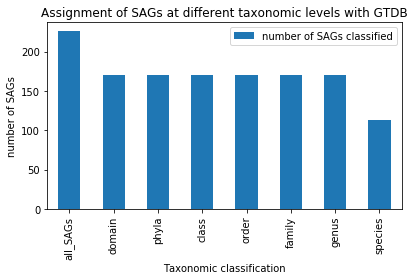

In [6]:

# for each tax level create a variable with the number of SAGs that were classified to at least that level
dsags=len(class_df[class_df['domain']!='d__'])
psags=len(class_df[class_df['phyla']!='p__'])
csags=len(class_df[class_df['class']!='c__'])
osags=len(class_df[class_df['order']!='o__'])
fsags=len(class_df[class_df['family']!='f__'])
gsags=len(class_df[class_df['genus']!='g__'])
ssags=len(class_df[class_df['species']!='s__'])

# Calculate the total nubmer of SAGs submitted to the analysis.
# note that for the total number of SAGs we are using the master_df that merged the GTDB results with the assembly stats
# this is because GTDB will omit SAGs that are unable to be classified
tsags=len(master_df['domain'])

# create a dictionary of the taxonomic levels and the value associated with it and thenconvert to a dataframe.
d={'tax_level': ['all_SAGs', 'domain', 'phyla', 'class', 'order', 'family', 'genus','species'], 'number of SAGs classified':
   [tsags, dsags, psags, csags, osags, fsags, gsags, ssags]}
GTDB_data_df=pd.DataFrame(data=d)


# create a plot showing how many cells are classified at each taxonomic level 
GTDB_data_df.plot(kind='bar', x='tax_level', y='number of SAGs classified')
plt.xlabel('Taxonomic classification')
plt.ylabel('number of SAGs')
plt.title('Assignment of SAGs at different taxonomic levels with GTDB')

plt.tight_layout()
plt.savefig("GTDB_taxonomic_levels.pdf")

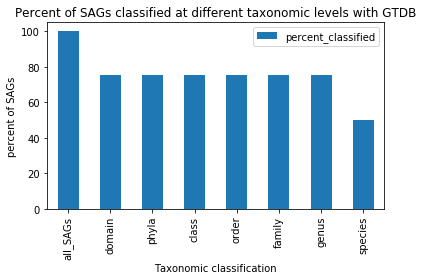

In [7]:
# add a column to the dataframe that is the percent of SAGs and replot.
# use the tsags variable previously created to calculate the percent of SAGs that were classified
GTDB_data_df['percent_classified']=GTDB_data_df['number of SAGs classified']/tsags*100


# generate the plot
GTDB_data_df.plot(kind='bar', x='tax_level', y='percent_classified')
plt.xlabel('Taxonomic classification')
plt.ylabel('percent of SAGs')
plt.title('Percent of SAGs classified at different taxonomic levels with GTDB')

plt.tight_layout()
plt.savefig("GTDB_taxonomic_levels_percent.pdf")

Interestingly all the SAGs that were classified (~75%) were classified to the genus level. There was a significant dropoff at the species level where only ~50% of SAGs were classified to the species level. 

### Now lets dive into the data a bit more and see what the distribution of different taxonomic groups is

In [8]:
# lets start with the distribution of Bacteria and Archaea
print(master_df.domain.value_counts())


d__Bacteria    170
Name: domain, dtype: int64


In [9]:
# and class
print(master_df.class.value_counts()) 

SyntaxError: invalid syntax (<ipython-input-9-39f75a94c5f1>, line 2)

In [10]:
# note the class level does not work because class is a method in python instead we can use the groupby function

grouped=master_df.groupby('class')['cells'].sum()
grouped#.sort()


class
c__Acidimicrobiia           7.0
c__Alphaproteobacteria    117.0
c__Bacteroidia              8.0
c__Cyanobacteriia          11.0
c__Gammaproteobacteria     27.0
Name: cells, dtype: float64

# Challenge 2 look at the distribution for the other taxonomic levels (phyla, order, family, genus, species) and sort the output from high to low


In [11]:
# grouped=master_df.groupby('domain')['cells'].sum().sort_values(ascending=False)
# grouped=master_df.groupby('phyla')['cells'].sum().sort_values(ascending=False)
# grouped=master_df.groupby('class')['cells'].sum().sort_values(ascending=False)
# grouped=master_df.groupby('order')['cells'].sum().sort_values(ascending=False)
# grouped=master_df.groupby('family')['cells'].sum().sort_values(ascending=False)
# grouped=master_df.groupby('genus')['cells'].sum().sort_values(ascending=False)
# grouped=master_df.groupby('species')['cells'].sum().sort_values(ascending=False)
grouped

class
c__Acidimicrobiia           7.0
c__Alphaproteobacteria    117.0
c__Bacteroidia              8.0
c__Cyanobacteriia          11.0
c__Gammaproteobacteria     27.0
Name: cells, dtype: float64

# Challenge 3: Examine the average genome size, completeness, estimated diameter, and number of cells for all members of given taxonomic level and create a plot to look at these distributions

In [12]:
genome_statistics=master_df.groupby('genus')['Estimated cell diameter (μm)', 'Assembly size (Mbp)', 
                                             'Genome completeness (%)'].mean()

genus_counts=master_df.groupby('genus')['cells'].sum()

genome_statistics=genome_statistics.merge(genus_counts, left_index=True, right_index=True)
genome_statistics=genome_statistics.round(2)
genome_statistics.reset_index(inplace=True)
genome_statistics


,genus,Estimated cell diameter (μm),Assembly size (Mbp),Genome completeness (%),cells
0,g__AAA536-G10,0.44,1335418.50,49.50,2.0
1,g__AG-337-I02,0.39,760587.75,43.88,8.0
2,g__AG-339-G14,0.29,722793.40,48.00,5.0
3,g__AG-422-B15,0.25,638639.00,36.00,4.0
4,g__Actinomarina,0.22,555009.71,38.14,7.0
...,...,...,...,...,...
37,g__TMED54,0.28,620755.00,28.00,2.0
38,g__TMED62,0.38,637046.50,30.00,2.0
39,g__TMED96,0.35,1088902.00,49.00,1.0
40,g__UBA4421,0.34,895072.00,20.00,1.0


No handles with labels found to put in legend.


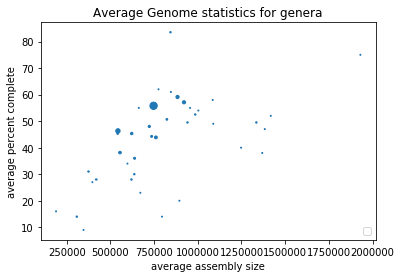

In [13]:
genome_statistics.plot.scatter(x='Assembly size (Mbp)', y='Genome completeness (%)', s=genome_statistics['cells'])
plt.xlabel('average assembly size')
plt.ylabel('average percent complete')
plt.title('Average Genome statistics for genera')

# how do I add a legend with the size correlating to the number of SAGs
plt.legend(loc='lower right', numpoints=3)


# Challenge 3.5 What if you wanted to add the standard deviation to your analysis?

In [14]:
genome_stdev=master_df.groupby('genus')['Estimated cell diameter (μm)', 'Assembly size (Mbp)', 
                                             'Genome completeness (%)'].std()
genome_stdev=genome_stdev.rename(columns={'Estimated cell diameter (μm)':'Estimated cell diameter (μm) stdev',
                                          'Assembly size (Mbp)':'Assembly size (Mbp)_stdev', 
                                          'Genome completeness (%)':'Genome completeness (%)_stdev'})
genome_statistics=genome_statistics.merge(genome_stdev, on='genus')
genome_statistics

,genus,Estimated cell diameter (μm),Assembly size (Mbp),Genome completeness (%),cells,Estimated cell diameter (μm) stdev,Assembly size (Mbp)_stdev,Genome completeness (%)_stdev
0,g__AAA536-G10,0.44,1335418.50,49.50,2.0,0.056569,321185.577684,16.263456
1,g__AG-337-I02,0.39,760587.75,43.88,8.0,0.041404,249944.546615,15.468286
2,g__AG-339-G14,0.29,722793.40,48.00,5.0,0.063008,349966.327554,18.096961
3,g__AG-422-B15,0.25,638639.00,36.00,4.0,0.067823,72093.601505,14.628739
4,g__Actinomarina,0.22,555009.71,38.14,7.0,0.031320,218493.381514,16.915758
...,...,...,...,...,...,...,...,...
37,g__TMED54,0.28,620755.00,28.00,2.0,0.021213,451250.091909,21.213203
38,g__TMED62,0.38,637046.50,30.00,2.0,0.028284,675.286976,1.414214
39,g__TMED96,0.35,1088902.00,49.00,1.0,NaN,NaN,NaN
40,g__UBA4421,0.34,895072.00,20.00,1.0,NaN,NaN,NaN


# Challenge 4: Compare the number of SAGs that were classified via 16S to the number that were classified using GTDB at each taxonomic level

In [19]:
# copy the SAG column and the 16S column to a new df
SSU_df=master_df[['SAG','SSU classification CREST/SILVA']].copy()
# change the name to eliminate the spaces and "/"
SSU_df=SSU_df.rename(columns = {'SSU classification CREST/SILVA':'SSU_classification'})

# expand the classification similar to before.
SSU_df[['domain', 'phyla', 'class', 'order', 'family', 'genus', 'species']]=SSU_df.SSU_classification.str.split(';', expand=True)
SSU_df=SSU_df.rename(columns = {'SSU classification CREST/SILVA':'GTDBtk_classification'})

# This is a bit clodgy and required a me to examine the data in a pretty good amount of detail in order to realize that 
# lineages where no SSU region was found got pupulated with None but that I oculd not really count "None" so I had to figure out 
# another way to generate these numbers.
dSSU=tsags-len(SSU_df[SSU_df['domain']=='d__?'])-len(SSU_df[SSU_df['domain']=='no SSU regions found'])
pSSU=tsags-len(SSU_df[SSU_df['phyla']=='p__?'])-len(SSU_df[SSU_df['domain']=='no SSU regions found'])
cSSU=tsags-len(SSU_df[SSU_df['class']=='c__?'])-len(SSU_df[SSU_df['domain']=='no SSU regions found'])
oSSU=tsags-len(SSU_df[SSU_df['order']=='o__?'])-len(SSU_df[SSU_df['domain']=='no SSU regions found'])
fSSU=tsags-len(SSU_df[SSU_df['family']=='f__?'])-len(SSU_df[SSU_df['domain']=='no SSU regions found'])
gSSU=tsags-len(SSU_df[SSU_df['genus']=='g__?'])-len(SSU_df[SSU_df['domain']=='no SSU regions found'])
sSSU=tsags-len(SSU_df[SSU_df['species']=='s__?'])-len(SSU_df[SSU_df['domain']=='no SSU regions found'])

#convert the data into a dataframe
d={'tax_level': ['all_SAGs', 'domain', 'phyla', 'class', 'order', 'family', 'genus','species'], 'number of SAGs classified':
   [tsags, dSSU, pSSU, cSSU, oSSU, fSSU, gSSU, sSSU]}
SSU_data_df=pd.DataFrame(data=d)
# add a percent column
SSU_data_df['percent_classified']=SSU_data_df['number of SAGs classified']/tsags*100

# add a method column
SSU_data_df['method']='SSU'
SSU_data_df

,tax_level,number of SAGs classified,percent_classified,method
0,all_SAGs,226,100.000000,SSU
1,domain,67,29.646018,SSU
2,phyla,67,29.646018,SSU
3,class,67,29.646018,SSU
4,order,67,29.646018,SSU
5,family,59,26.106195,SSU
6,genus,17,7.522124,SSU
7,species,0,0.000000,SSU


Text(0.5, 1.0, 'Comparsion of SSU and GTDB SAG classification')

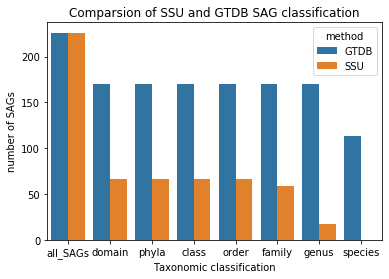

In [21]:
# add the method column to our earlier df that has the GTDB classification summary
GTDB_data_df['method']='GTDB'

# stack the dataframes into a single dataframe for easier plotting
compare_df=pd.concat([GTDB_data_df, SSU_data_df])
compare_df

# plot the data. We are using seaborn this time because it handles colors assigning colors to strings in columns better than 
# matolotlib
sns.barplot(data=compare_df, x='tax_level', y='number of SAGs classified', hue='method')

#add labels and titles
plt.xlabel('Taxonomic classification')
plt.ylabel('number of SAGs')
plt.title('Comparsion of SSU and GTDB SAG classification')


Text(0.5, 1.0, 'Comparsion of SSU and GTDB SAG classification(%)')

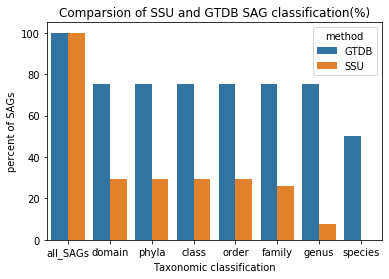

In [22]:
# generate a plot of the percentages
sns.barplot(data=compare_df, x='tax_level', y='percent_classified', hue='method')

plt.xlabel('Taxonomic classification')
plt.ylabel('percent of SAGs')
plt.title('Comparsion of SSU and GTDB SAG classification(%)')